In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw
Processing...
Done!






In [3]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

D:\myConda\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
D:\myConda\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
D:\myConda\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
D:\myConda\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [6]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [7]:
X_train = X_train.float()
X_test = X_test.float()

In [8]:
X_train.shape, X_test.shape # это трёхмерный тензор, а нам бы двумерный

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [9]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

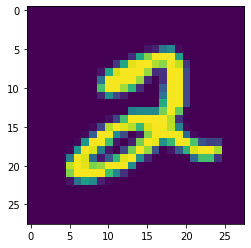

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5, :, :]) # но для начала отрисуем, чтобы знать, каковы данные
plt.show()

In [14]:
print(y_train[5]) # этому соответствует 5 в таргете

tensor(2)


In [15]:
X_train = X_train.reshape([-1, 28 * 28])
#  У нас был тензор X_train, это трёхмерный тензор, 
#  а мы хотим двухмерный тензор, где первая размерность сохраниться -- будет 60 000 изображений, 
#  а вторая размерность, она растянется -- было 28х28, а получится одна размерность: 784 пикселя.
X_test = X_test.reshape([-1, 28 * 28])

In [17]:
X_train.shape # проверим размерность

torch.Size([60000, 784])

In [18]:
class MNISTNet(torch.nn.Module):  # создадим нейронную сеть
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons) # два полносвязанных слоя. сюда приходит 28 на 28, 
                                                              # (то есть вот эти 784 пикселя) и передаются в n_hidden_neurons
        self.ac1 = torch.nn.Sigmoid() # функция активации, чтобы придать нелинейности
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) # а сюда приходит n_hidden_neurons,а на выходе одна из 10 цифр
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100) # создадим такую нейронную сеть, назовём её MNISTnet, скажем что у неё внутри 100 скрытых нейронов. 

In [25]:
torch.cuda.is_available()

False

In [26]:
!nvidia-smi

"nvidia-smi" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parameters())

[Parameter containing:
 tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
         [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
         [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
         ...,
         [ 0.0221,  0.0258, -0.0088,  ..., -0.0141,  0.0051, -0.0318],
         [-0.0217, -0.0136,  0.0185,  ..., -0.0012, -0.0012, -0.0017],
         [ 0.0142,  0.0089, -0.0053,  ...,  0.0311, -0.0181,  0.0020]],
        requires_grad=True), Parameter containing:
 tensor([ 0.2896, -0.3967, -1.8129,  0.7900, -0.4180, -1.1845, -2.7207, -0.8449,
         -0.0255, -1.2720, -0.9076, -1.3713, -1.5349,  0.9492, -0.7544,  0.6823,
         -1.7295, -0.9960,  0.4311,  2.0223,  0.5158,  0.3564, -1.3188, -0.0385,
         -0.7026,  0.1600, -0.9543, -0.0858,  0.4359,  0.2379, -0.2293, -0.9201,
          1.0040, -0.6795,  0.2676, -0.8436,  1.7181, -0.7290,  0.6262,  0.0748,
         -0.6961,  0.1009, -0.4099,  0.8146, -0.4944, -0.0658, -0.0544, -1.9937,

In [28]:
loss = torch.nn.CrossEntropyLoss() #  кросс-энтропия, потому что это loss, который используется в классификации.
#  функция CrossEntropyLoss на вход принимает не вероятности, а те выходы, 
#  которые до софтмакса, то есть функция forward, которую мы написали, не содержала софтмакс, 
#  потому что мы хотим немножко ускорить наши вычисления, избежав софтмакса. 
#  Для ускорения вычислений можно софтмакс и кроссэнтропию соединить одну функцию, 
#  и тогда будут немножко быстрее и стабильнее выполнять вычисления. 

optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3) # метод градиентного спуска,
                                             # здесь -- Adam (практически, золотой стандарт), на входе - все параметры сети

In [31]:
# будем обучаться батчевым или стохастическим градиентным спуском. 
# То есть мы будем делить наш датасет на маленькие части (так называемые батчи), 
# передавать эти батчи в нейронную сеть с помощью функции forward.

batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9705)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9702)
tensor(0.9684)
tensor(0.9697)
tensor(0.9701)
tensor(0.9706)
tensor(0.9703)
tensor(0.9703)
tensor(0.9706)
tensor(0.9695)
tensor(0.9708)
tensor(0.9708)
tensor(0.9704)
tensor(0.9704)
tensor(0.9718)
tensor(0.9728)
tensor(0.9717)
tensor(0.9708)
tensor(0.9716)
tensor(0.9704)
tensor(0.9707)
tensor(0.9714)
tensor(0.9707)
tensor(0.9708)
tensor(0.9714)
tensor(0.9709)
tensor(0.9713)
tensor(0.9704)
tensor(0.9704)
tensor(0.9695)
tensor(0.9686)
tensor(0.9689)
tensor(0.9697)
tensor(0.9702)
tensor(0.9703)
tensor(0.9685)
tensor(0.9708)
tensor(0.9712)
tensor(0.9730)
tensor(0.9722)
tensor(0.9704)
tensor(0.9697)
tensor(0.9692)
tensor(0.9684)
tensor(0.9679)
tensor(0.9687)
tensor(0.9685)
tensor(0.9701)
tensor(0.9694)
tensor(0.9696)
tensor(0.9689)
tensor(0.9680)
tensor(0.9695)
tensor(0.9688)
tensor(0.9679)
tensor(0.9688)
tensor(0.9691)
tensor(0.9688)
tensor(0.9691)
tensor(0.9689)
tensor(0.9701)
tensor(0.9697)
tensor(0.9701)
tensor(0.9

KeyboardInterrupt: 

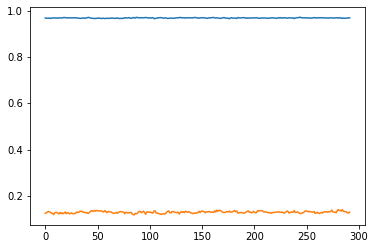

In [32]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);